## Кластеризация клиентов банка

In [2]:
import pandas as pd

df = pd.read_csv("../../../data/BankChurnersProcessed.csv")
df

,CLIENTNUM,Attrition_Flag,Customer_Age,Gender,Dependent_count,Education_Level,Marital_Status,Income_Category,Card_Category,Months_on_book,...,Months_Inactive_12_mon,Contacts_Count_12_mon,Credit_Limit,Total_Revolving_Bal,Avg_Open_To_Buy,Total_Amt_Chng_Q4_Q1,Total_Trans_Amt,Total_Trans_Ct,Total_Ct_Chng_Q4_Q1,Avg_Utilization_Ratio
0,768805383,Existing Customer,45,M,3,High School,Married,$60K - $80K,Blue,39,...,1,3,12691.0,777,11914.0,1.335,1144,42,1.625,0.061
1,818770008,Existing Customer,49,F,5,Graduate,Single,Less than $40K,Blue,44,...,1,2,8256.0,864,7392.0,1.541,1291,33,3.714,0.105
2,713982108,Existing Customer,51,M,3,Graduate,Married,$80K - $120K,Blue,36,...,1,0,3418.0,0,3418.0,2.594,1887,20,2.333,0.000
3,769911858,Existing Customer,40,F,4,High School,Unknown,Less than $40K,Blue,34,...,4,1,3313.0,2517,796.0,1.405,1171,20,2.333,0.760
4,709106358,Existing Customer,40,M,3,Uneducated,Married,$60K - $80K,Blue,21,...,1,0,4716.0,0,4716.0,2.175,816,28,2.500,0.000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10122,772366833,Existing Customer,50,M,2,Graduate,Single,$40K - $60K,Blue,40,...,2,3,4003.0,1851,2152.0,0.703,15476,117,0.857,0.462
10123,710638233,Attrited Customer,41,M,2,Unknown,Divorced,$40K - $60K,Blue,25,...,2,3,4277.0,2186,2091.0,0.804,8764,69,0.683,0.511
10124,716506083,Attrited Customer,44,F,1,High School,Married,Less than $40K,Blue,36,...,3,4,5409.0,0,5409.0,0.819,10291,60,0.818,0.000
10125,717406983,Attrited Customer,30,M,2,Graduate,Unknown,$40K - $60K,Blue,36,...,3,3,5281.0,0,5281.0,0.535,8395,62,0.722,0.000


In [5]:
df['Income_Category'].value_counts()

Less than $40K    3561
$40K - $60K       1790
$80K - $120K      1535
$60K - $80K       1402
Unknown           1112
$120K +            727
Name: Income_Category, dtype: int64

In [7]:
income_cat = { 
    'Less than $40K' : 0,
    '$40K - $60K' : 1,
    '$60K - $80K' : 2,
    '$80K - $120K' : 3,
    '$120K +' : 727 }

df.drop(df[df['Income_Category']=='Unknown'].index,inplace=True)
df['Income_Category'] = df['Income_Category'].apply(lambda x: income_cat[x])
df

,CLIENTNUM,Attrition_Flag,Customer_Age,Gender,Dependent_count,Education_Level,Marital_Status,Income_Category,Card_Category,Months_on_book,...,Months_Inactive_12_mon,Contacts_Count_12_mon,Credit_Limit,Total_Revolving_Bal,Avg_Open_To_Buy,Total_Amt_Chng_Q4_Q1,Total_Trans_Amt,Total_Trans_Ct,Total_Ct_Chng_Q4_Q1,Avg_Utilization_Ratio
0,768805383,Existing Customer,45,M,3,High School,Married,2,Blue,39,...,1,3,12691.0,777,11914.0,1.335,1144,42,1.625,0.061
1,818770008,Existing Customer,49,F,5,Graduate,Single,0,Blue,44,...,1,2,8256.0,864,7392.0,1.541,1291,33,3.714,0.105
2,713982108,Existing Customer,51,M,3,Graduate,Married,3,Blue,36,...,1,0,3418.0,0,3418.0,2.594,1887,20,2.333,0.000
3,769911858,Existing Customer,40,F,4,High School,Unknown,0,Blue,34,...,4,1,3313.0,2517,796.0,1.405,1171,20,2.333,0.760
4,709106358,Existing Customer,40,M,3,Uneducated,Married,2,Blue,21,...,1,0,4716.0,0,4716.0,2.175,816,28,2.500,0.000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10122,772366833,Existing Customer,50,M,2,Graduate,Single,1,Blue,40,...,2,3,4003.0,1851,2152.0,0.703,15476,117,0.857,0.462
10123,710638233,Attrited Customer,41,M,2,Unknown,Divorced,1,Blue,25,...,2,3,4277.0,2186,2091.0,0.804,8764,69,0.683,0.511
10124,716506083,Attrited Customer,44,F,1,High School,Married,0,Blue,36,...,3,4,5409.0,0,5409.0,0.819,10291,60,0.818,0.000
10125,717406983,Attrited Customer,30,M,2,Graduate,Unknown,1,Blue,36,...,3,3,5281.0,0,5281.0,0.535,8395,62,0.722,0.000


In [9]:
df.drop(columns=['CLIENTNUM'],inplace=True)

In [10]:
df['Education_Level'].value_counts()

Graduate         2796
High School      1788
Unknown          1374
Uneducated       1302
College           905
Post-Graduate     469
Doctorate         381
Name: Education_Level, dtype: int64

In [11]:
edu_level = { 'Uneducated' : 0, 'High School' : 1,  'College' : 2, 'Graduate' : 3, 'Post-Graduate' : 4, 'Doctorate' : 5 }

df.drop(df[df['Education_Level']=='Unknown'].index,inplace=True)
df['Education_Level'] = df['Education_Level'].apply(lambda x: edu_level[x])
df

,Attrition_Flag,Customer_Age,Gender,Dependent_count,Education_Level,Marital_Status,Income_Category,Card_Category,Months_on_book,Total_Relationship_Count,Months_Inactive_12_mon,Contacts_Count_12_mon,Credit_Limit,Total_Revolving_Bal,Avg_Open_To_Buy,Total_Amt_Chng_Q4_Q1,Total_Trans_Amt,Total_Trans_Ct,Total_Ct_Chng_Q4_Q1,Avg_Utilization_Ratio
0,Existing Customer,45,M,3,1,Married,2,Blue,39,5,1,3,12691.0,777,11914.0,1.335,1144,42,1.625,0.061
1,Existing Customer,49,F,5,3,Single,0,Blue,44,6,1,2,8256.0,864,7392.0,1.541,1291,33,3.714,0.105
2,Existing Customer,51,M,3,3,Married,3,Blue,36,4,1,0,3418.0,0,3418.0,2.594,1887,20,2.333,0.000
3,Existing Customer,40,F,4,1,Unknown,0,Blue,34,3,4,1,3313.0,2517,796.0,1.405,1171,20,2.333,0.760
4,Existing Customer,40,M,3,0,Married,2,Blue,21,5,1,0,4716.0,0,4716.0,2.175,816,28,2.500,0.000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10121,Existing Customer,56,F,1,3,Single,0,Blue,50,4,1,4,3688.0,606,3082.0,0.570,14596,120,0.791,0.164
10122,Existing Customer,50,M,2,3,Single,1,Blue,40,3,2,3,4003.0,1851,2152.0,0.703,15476,117,0.857,0.462
10124,Attrited Customer,44,F,1,1,Married,0,Blue,36,5,3,4,5409.0,0,5409.0,0.819,10291,60,0.818,0.000
10125,Attrited Customer,30,M,2,3,Unknown,1,Blue,36,4,3,3,5281.0,0,5281.0,0.535,8395,62,0.722,0.000


In [12]:
df['Card_Category'].value_counts()

Blue        7106
Silver       433
Gold          90
Platinum      12
Name: Card_Category, dtype: int64

In [13]:
card_cat = { 'Blue' : 0, 'Silver' : 1, 'Gold' : 2, 'Platinum' : 3 }
df['Card_Category'] = df['Card_Category'].apply(lambda x: card_cat[x])
df

,Attrition_Flag,Customer_Age,Gender,Dependent_count,Education_Level,Marital_Status,Income_Category,Card_Category,Months_on_book,Total_Relationship_Count,Months_Inactive_12_mon,Contacts_Count_12_mon,Credit_Limit,Total_Revolving_Bal,Avg_Open_To_Buy,Total_Amt_Chng_Q4_Q1,Total_Trans_Amt,Total_Trans_Ct,Total_Ct_Chng_Q4_Q1,Avg_Utilization_Ratio
0,Existing Customer,45,M,3,1,Married,2,0,39,5,1,3,12691.0,777,11914.0,1.335,1144,42,1.625,0.061
1,Existing Customer,49,F,5,3,Single,0,0,44,6,1,2,8256.0,864,7392.0,1.541,1291,33,3.714,0.105
2,Existing Customer,51,M,3,3,Married,3,0,36,4,1,0,3418.0,0,3418.0,2.594,1887,20,2.333,0.000
3,Existing Customer,40,F,4,1,Unknown,0,0,34,3,4,1,3313.0,2517,796.0,1.405,1171,20,2.333,0.760
4,Existing Customer,40,M,3,0,Married,2,0,21,5,1,0,4716.0,0,4716.0,2.175,816,28,2.500,0.000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10121,Existing Customer,56,F,1,3,Single,0,0,50,4,1,4,3688.0,606,3082.0,0.570,14596,120,0.791,0.164
10122,Existing Customer,50,M,2,3,Single,1,0,40,3,2,3,4003.0,1851,2152.0,0.703,15476,117,0.857,0.462
10124,Attrited Customer,44,F,1,1,Married,0,0,36,5,3,4,5409.0,0,5409.0,0.819,10291,60,0.818,0.000
10125,Attrited Customer,30,M,2,3,Unknown,1,0,36,4,3,3,5281.0,0,5281.0,0.535,8395,62,0.722,0.000


In [14]:
df['Gender'] = df['Gender'].apply(lambda x: 1 if x=="F" else 0)

In [16]:
df['Marital_Status'].value_counts()

Married     3564
Single      2948
Divorced     569
Unknown      560
Name: Marital_Status, dtype: int64

In [17]:
marital_stat = { 'Single' : 0, 'Married' : 1, 'Divorced' : 2 }

df.drop(df[df['Marital_Status']=='Unknown'].index,inplace=True)
df['Marital_Status'] = df['Marital_Status'].apply(lambda x: marital_stat[x])
df

,Attrition_Flag,Customer_Age,Gender,Dependent_count,Education_Level,Marital_Status,Income_Category,Card_Category,Months_on_book,Total_Relationship_Count,Months_Inactive_12_mon,Contacts_Count_12_mon,Credit_Limit,Total_Revolving_Bal,Avg_Open_To_Buy,Total_Amt_Chng_Q4_Q1,Total_Trans_Amt,Total_Trans_Ct,Total_Ct_Chng_Q4_Q1,Avg_Utilization_Ratio
0,Existing Customer,45,0,3,1,1,2,0,39,5,1,3,12691.0,777,11914.0,1.335,1144,42,1.625,0.061
1,Existing Customer,49,1,5,3,0,0,0,44,6,1,2,8256.0,864,7392.0,1.541,1291,33,3.714,0.105
2,Existing Customer,51,0,3,3,1,3,0,36,4,1,0,3418.0,0,3418.0,2.594,1887,20,2.333,0.000
4,Existing Customer,40,0,3,0,1,2,0,21,5,1,0,4716.0,0,4716.0,2.175,816,28,2.500,0.000
5,Existing Customer,44,0,2,3,1,1,0,36,3,1,2,4010.0,1247,2763.0,1.376,1088,24,0.846,0.311
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10120,Existing Customer,54,0,1,1,0,2,0,34,5,2,0,13940.0,2109,11831.0,0.660,15577,114,0.754,0.151
10121,Existing Customer,56,1,1,3,0,0,0,50,4,1,4,3688.0,606,3082.0,0.570,14596,120,0.791,0.164
10122,Existing Customer,50,0,2,3,0,1,0,40,3,2,3,4003.0,1851,2152.0,0.703,15476,117,0.857,0.462
10124,Attrited Customer,44,1,1,1,1,0,0,36,5,3,4,5409.0,0,5409.0,0.819,10291,60,0.818,0.000


In [18]:
df['Attrition_Flag'] = df['Attrition_Flag'].apply(lambda x : 0 if x=='Existing Customer' else 1) 
df

,Attrition_Flag,Customer_Age,Gender,Dependent_count,Education_Level,Marital_Status,Income_Category,Card_Category,Months_on_book,Total_Relationship_Count,Months_Inactive_12_mon,Contacts_Count_12_mon,Credit_Limit,Total_Revolving_Bal,Avg_Open_To_Buy,Total_Amt_Chng_Q4_Q1,Total_Trans_Amt,Total_Trans_Ct,Total_Ct_Chng_Q4_Q1,Avg_Utilization_Ratio
0,0,45,0,3,1,1,2,0,39,5,1,3,12691.0,777,11914.0,1.335,1144,42,1.625,0.061
1,0,49,1,5,3,0,0,0,44,6,1,2,8256.0,864,7392.0,1.541,1291,33,3.714,0.105
2,0,51,0,3,3,1,3,0,36,4,1,0,3418.0,0,3418.0,2.594,1887,20,2.333,0.000
4,0,40,0,3,0,1,2,0,21,5,1,0,4716.0,0,4716.0,2.175,816,28,2.500,0.000
5,0,44,0,2,3,1,1,0,36,3,1,2,4010.0,1247,2763.0,1.376,1088,24,0.846,0.311
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10120,0,54,0,1,1,0,2,0,34,5,2,0,13940.0,2109,11831.0,0.660,15577,114,0.754,0.151
10121,0,56,1,1,3,0,0,0,50,4,1,4,3688.0,606,3082.0,0.570,14596,120,0.791,0.164
10122,0,50,0,2,3,0,1,0,40,3,2,3,4003.0,1851,2152.0,0.703,15476,117,0.857,0.462
10124,1,44,1,1,1,1,0,0,36,5,3,4,5409.0,0,5409.0,0.819,10291,60,0.818,0.000


In [20]:
features = [
    'Customer_Age', 'Gender', 'Dependent_count',
    'Education_Level', 'Marital_Status', 'Income_Category', 'Card_Category',
    'Months_on_book', 'Total_Relationship_Count', 'Months_Inactive_12_mon',
    'Contacts_Count_12_mon', 'Credit_Limit', 'Total_Revolving_Bal',
    'Avg_Open_To_Buy', 'Total_Amt_Chng_Q4_Q1', 'Total_Trans_Amt',
    'Total_Trans_Ct', 'Total_Ct_Chng_Q4_Q1', 'Avg_Utilization_Ratio']

In [24]:
import sklearn as sk
import sklearn.cluster
import sklearn.preprocessing
import matplotlib.pyplot as plt

X = df[features]

scaler = sk.preprocessing.StandardScaler().fit(X)
Xt = scaler.transform(X)

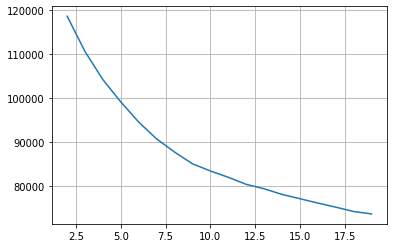

In [27]:
inertias = []
for k in range(2,20):
    km = sk.cluster.KMeans(n_clusters=k).fit(Xt)
    inertias.append(km.inertia_)

plt.plot(range(2,20),inertias)
plt.grid()

In [38]:
model = sk.cluster.KMeans(n_clusters=3).fit(Xt)

In [39]:
pd.DataFrame(scaler.inverse_transform(model.cluster_centers_),columns=features)

,Customer_Age,Gender,Dependent_count,Education_Level,Marital_Status,Income_Category,Card_Category,Months_on_book,Total_Relationship_Count,Months_Inactive_12_mon,Contacts_Count_12_mon,Credit_Limit,Total_Revolving_Bal,Avg_Open_To_Buy,Total_Amt_Chng_Q4_Q1,Total_Trans_Amt,Total_Trans_Ct,Total_Ct_Chng_Q4_Q1,Avg_Utilization_Ratio
0,46.675578,0.424855,2.269509,2.128613,0.652818,38.715679,0.014451,36.409682,3.993497,2.397760,2.590318,6591.531900,563.838873,6027.693027,0.722451,3260.548049,56.276012,0.657315,0.087214
1,45.905709,0.671584,2.313663,2.052277,0.689545,16.781591,0.003528,35.451892,3.836434,2.311097,2.357601,3696.661065,1678.401860,2018.259205,0.791674,4562.857922,67.850866,0.756461,0.542052
2,46.741423,0.087866,2.558996,1.955649,0.623431,220.567364,0.447699,36.370711,3.371548,2.297071,2.392469,25410.696234,1232.733054,24177.963180,0.767791,6580.626778,74.825941,0.719741,0.056514


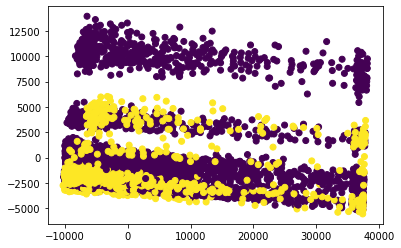

In [41]:
res = sk.decomposition.PCA(n_components=2).fit_transform(df[features])
plt.scatter(res[:,0],res[:,1],c=df['Attrition_Flag'])
plt.show()